In [48]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def get_data_from_api():
    # API endpoint URL
    url = 'https://daten.stadt.sg.ch/api/records/1.0/search/?dataset=kostenstellenplan-stadt-stgallen'

    # Optional: Define parameters for the API request
    params = {
        # Example parameters, you can modify or add more based on your requirements
        'rows': 100,  # Adjust the number of records to fetch as needed
        'disjunctive.kst_bezeichnung': 'true'
    }

    # Make the GET request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        return response.json()  # Return the JSON response
    else:
        return f'Error: {response.status_code}'

# Call the function to get data
data = get_data_from_api()
print(data)

{'nhits': 193, 'parameters': {'dataset': 'kostenstellenplan-stadt-stgallen', 'rows': 100, 'start': 0, 'disjunctive': {'kst_bezeichnung': 'true'}, 'format': 'json', 'timezone': 'UTC'}, 'records': [{'datasetid': 'kostenstellenplan-stadt-stgallen', 'recordid': '3a73602e24f4e9f6bc49d5a7732de09c9be6dba8', 'fields': {'id': 'ID', 'abk': 'BB', 'nr': 1, 'kst_bisher': '1', 'kst_bezeichnung': 'Bürgerschaft und Behörden'}, 'record_timestamp': '2021-11-25T08:13:03.584Z'}, {'datasetid': 'kostenstellenplan-stadt-stgallen', 'recordid': '337ac5335af5c15cc0b2b32a078dd66b0a992052', 'fields': {'id': '1100-ID', 'nr': 3, 'kst_neu': '1100', 'kst_bisher': '11', 'kst_bezeichnung': 'Stadtparlament und parlamentarische Kommissionen'}, 'record_timestamp': '2021-11-25T08:13:03.584Z'}, {'datasetid': 'kostenstellenplan-stadt-stgallen', 'recordid': 'e6ab826cacfdae8944f6f75f7652d127488b49e2', 'fields': {'id': '1200-ID', 'nr': 6, 'kst_neu': '1200', 'kst_bisher': '12', 'kst_bezeichnung': 'Stadtrat'}, 'record_timestamp':

In [62]:
# Parse and create a dataframe
if isinstance(data, dict) and 'records' in data:
    # Extract the fields from each record
    records = data['records']
    df_data = []
    for record in records:
        fields = record.get('fields', {})
        df_data.append({
            'kst_bisher': fields.get('kst_bisher'),
            'kst_neu': fields.get('kst_neu'),
            'abk': fields.get('abk'),
            'kst_bezeichnung': fields.get('kst_bezeichnung'),
            'id': record.get('recordid'),
            'nr': fields.get('nr')
        })

    # Create the dataframe
    df = pd.DataFrame(df_data)

    # Display the dataframe
    print(df.head())
else:
    print("Error or unexpected format in API response:", data)


  kst_bisher kst_neu   abk                                   kst_bezeichnung  \
0          1    None    BB                         Bürgerschaft und Behörden   
1         11    1100  None  Stadtparlament und parlamentarische Kommissionen   
2         12    1200  None                                          Stadtrat   
3         15    1500  None                                      Ombudsstelle   
4         19     190   KOM                                     Kommunikation   

                                         id  nr  
0  3a73602e24f4e9f6bc49d5a7732de09c9be6dba8   1  
1  337ac5335af5c15cc0b2b32a078dd66b0a992052   3  
2  e6ab826cacfdae8944f6f75f7652d127488b49e2   6  
3  e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1   9  
4  29a496727a625b8082f192147ba9dc52054fbb7d  28  


In the following dataframe, "kst_bisher" is aligned with “HRM1 Kontenrahmen”. "kst_neu" contains the updated accounts, based on "HRM2 Kontenrahmen”.

In [40]:
df.head()

,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
0,1,None,BB,Bürgerschaft und Behörden,3a73602e24f4e9f6bc49d5a7732de09c9be6dba8,1
1,11,1100,None,Stadtparlament und parlamentarische Kommissionen,337ac5335af5c15cc0b2b32a078dd66b0a992052,3
2,12,1200,None,Stadtrat,e6ab826cacfdae8944f6f75f7652d127488b49e2,6
3,15,1500,None,Ombudsstelle,e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1,9
4,19,190,KOM,Kommunikation,29a496727a625b8082f192147ba9dc52054fbb7d,28


Check how many cost accounts survived the HRM1 -> HRM2 switch

In [77]:
# Filter rows where both 'kst_bisher' and 'kst_neu' have non-null values
surviving_kst = df.dropna(subset=['kst_bisher', 'kst_neu'])
surviving_kst.head()


,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
1,11,1100,None,Stadtparlament und parlamentarische Kommissionen,337ac5335af5c15cc0b2b32a078dd66b0a992052,3
2,12,1200,None,Stadtrat,e6ab826cacfdae8944f6f75f7652d127488b49e2,6
3,15,1500,None,Ombudsstelle,e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1,9
4,19,190,KOM,Kommunikation,29a496727a625b8082f192147ba9dc52054fbb7d,28
5,22,220,BD,Bevölkerungsdienste,87e3605b21874cbd7660c2216560e88b4c9e643b,53


Check how many cost accounts were eliminated with HRM1 -> HRM2

In [60]:
# Keep only rows where 'kst_bisher' or 'kst_neu' are NaN
eliminated_kst = df[df['kst_bisher'].notna() & df['kst_neu'].isna()]
eliminated_kst

,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
0,1,None,BB,Bürgerschaft und Behörden,3a73602e24f4e9f6bc49d5a7732de09c9be6dba8,1
16,3,None,DBF,Direktion Bildung und Freizeit,9453ad13b35b76428dd0ed9260116f50bcaff08b,177
94,6,None,DPB,Direktion Planung und Bau,9ecbcfed2370bb263ee669a66416ebc1d1088976,658


Check how many cost accounts were created with HRM1 -> HRM2

In [64]:
added_kst = df[df['kst_neu'].notna() & df['kst_bisher'].isna()]
added_kst.head()

,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
9,None,2600,None,Verwaltung der Dienststelle,8957b1de330bdee03b25f70d8e786d566420cfbd,124
30,None,6304,None,Öffentliche Anlagen,e785d4474799c809b253a127c95ab1a6e9cc7aef,1007
31,None,6305,None,Friedhöfe,ad668b86efbc0206043cc4d4f71494721ae291bf,1013
33,None,6500,None,Amt für Baubewilligungen,58503c10b106112940060055fcd432b69995c44f,1357
35,None,670,GBA,Grundbuchamt,a893f83f32883a163b144b2e7b20ada7ea6afe29,1372


Check how many cost accounts there were with HRM1

In [65]:
# Drop rows where 'kst_bisher' is None
old_kst = df.dropna(subset=['kst_bisher'])
old_kst.head()

,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
0,1,None,BB,Bürgerschaft und Behörden,3a73602e24f4e9f6bc49d5a7732de09c9be6dba8,1
1,11,1100,None,Stadtparlament und parlamentarische Kommissionen,337ac5335af5c15cc0b2b32a078dd66b0a992052,3
2,12,1200,None,Stadtrat,e6ab826cacfdae8944f6f75f7652d127488b49e2,6
3,15,1500,None,Ombudsstelle,e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1,9
4,19,190,KOM,Kommunikation,29a496727a625b8082f192147ba9dc52054fbb7d,28


In [80]:
len(old_kst)

78

Check how many cost accounts there are with HRM2

In [66]:
# Drop rows where 'kst_neu' is None
new_kst = df.dropna(subset=['kst_neu'])
new_kst.head()

,kst_bisher,kst_neu,abk,kst_bezeichnung,id,nr
1,11,1100,None,Stadtparlament und parlamentarische Kommissionen,337ac5335af5c15cc0b2b32a078dd66b0a992052,3
2,12,1200,None,Stadtrat,e6ab826cacfdae8944f6f75f7652d127488b49e2,6
3,15,1500,None,Ombudsstelle,e30e49a0c4dea4bd005a3a1ae7617a80f726c1c1,9
4,19,190,KOM,Kommunikation,29a496727a625b8082f192147ba9dc52054fbb7d,28
5,22,220,BD,Bevölkerungsdienste,87e3605b21874cbd7660c2216560e88b4c9e643b,53


In [81]:
len(new_kst)

97

The following chart summarizes the HRM1 -> HRM2 cost account transition

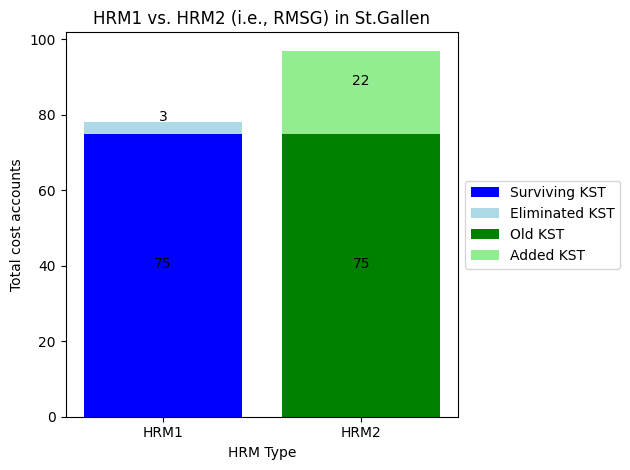

In [90]:
# Sample DataFrame sizes
num_surviving_kst = len(surviving_kst) 
num_eliminated_kst = len(eliminated_kst) 
num_old_kst = len(old_kst) - len(eliminated_kst)
num_added_kst = len(added_kst)

# Calculating HRM1 and HRM2 values
HRM1_values = [num_surviving_kst, num_eliminated_kst]
HRM2_values = [num_old_kst, num_added_kst]

# Labels for the groups
group_labels = ['HRM1', 'HRM2']

# Creating the stacked bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(group_labels[0], HRM1_values[0], label='Surviving KST', color='blue')
bar2 = ax.bar(group_labels[0], HRM1_values[1], bottom=HRM1_values[0], label='Eliminated KST', color='lightblue')
bar3 = ax.bar(group_labels[1], HRM2_values[0], label='Old KST', color='green')
bar4 = ax.bar(group_labels[1], HRM2_values[1], bottom=HRM2_values[0], label='Added KST', color='lightgreen')

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Adding title and labels
plt.title('HRM1 vs. HRM2 (i.e., RMSG) in St.Gallen')
plt.xlabel('HRM Type')
plt.ylabel('Total cost accounts')

# Adding a legend to the right of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()
